In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('word_sentiments.csv')

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
from gensim.models import KeyedVectors

filename = 'word2vecSmall.bin.gz'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

df['embedding'] = df['word'].apply(lambda word: model[word])

In [9]:
X = np.stack(df['embedding'])

In [11]:
X.shape

len(df['embedding'])

13525

In [12]:
Y = df['score'].values

In [14]:
Y.shape

(13525,)

In [15]:
from sklearn.linear_model import LinearRegression

classifier = LinearRegression()

classifier.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
classifier.coef_.shape

(300,)

In [18]:
classifier.intercept_

0.05662659

In [20]:
happy_vector = model['happy']
sad_vector = model['sad']

print(classifier.predict([happy_vector]))
print(classifier.predict([sad_vector]))

[0.2844408]
[-0.24300572]


In [22]:
test_words = ['nice', 'mean', 'bad', 'good', 'sad', 'happy', 'fantasic', 'terrible']

test_df = df[df['word'].str.lower().isin(test_words)].copy()
test_df


,word,score,embedding
16,good,0.500,"[0.040527344, 0.0625, -0.017456055, 0.07861328..."
106,bad,-0.875,"[0.06298828, 0.12451172, 0.11328125, 0.0732421..."
164,happy,0.875,"[-0.0005187988, 0.16015625, 0.0016098022, 0.02..."
649,Good,0.500,"[-0.10888672, -0.07470703, -0.045410156, -0.00..."
750,sad,-0.625,"[0.18945312, 0.045898438, 0.06689453, -0.04467..."
907,terrible,-0.625,"[0.1640625, 0.19238281, 0.092285156, 0.1308593..."
1833,Bad,-0.875,"[-0.078125, -0.11279297, 0.018676758, 0.080566..."
2288,Happy,0.875,"[0.05078125, -0.109375, -0.12597656, 0.1240234..."
2638,GOOD,0.500,"[-0.34179688, -0.41015625, 0.45117188, -0.2871..."
6365,Sad,-0.625,"[0.22851562, -0.04663086, 0.11230469, -0.00616..."


In [24]:
train_df = df[~df['word'].str.lower().isin(test_words)].copy()

train_df.head()

,word,score,embedding
0,is,0.125,"[0.0070495605, -0.07324219, 0.171875, 0.022583..."
1,not,-0.625,"[0.08496094, -0.095214844, 0.119140625, 0.1118..."
2,will,0.125,"[0.048828125, 0.16699219, 0.16894531, 0.087402..."
3,an,-0.125,"[0.12597656, 0.19042969, 0.06982422, 0.0722656..."
4,had,0.250,"[-0.05810547, 0.05810547, 0.013305664, -0.0003..."


In [25]:
X_train = np.stack(train_df['embedding'])
Y_train = train_df['score'].values

X_test = np.stack(test_df['embedding'])
Y_test = test_df['score'].values

In [26]:
classifier.score(X_test, Y_test) #R^2

0.5910519590411709

In [27]:
test_df['predicted_score'] = classifier.predict(X_test)


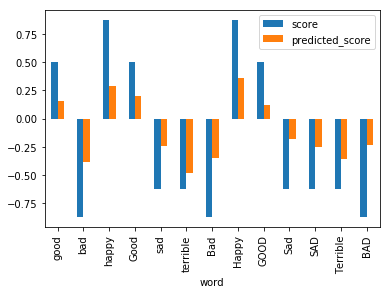

In [31]:
test_df.plot.bar(x='word',y=['score', 'predicted_score'])